In [1]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [2]:
image=[]

x_test =[]

y_train =[]
k=0
for i in range (1,12):
    if i==11:
        mypath ="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/test/"
    else:
        mypath ="C:/Users/ATHUL VIJAY M P/Desktop/Pattern/simulation3/dataset/training/s"+str(i)+"/"
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for j in range(len(onlyfiles)):
        s=str(mypath)+str(onlyfiles[j])
        img= cv2.imread(s)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image.append(gray)
        ravel_img=np.ravel(image[k])  
        k +=1
        if i==11:
            x_test.append(ravel_img)
        else:            
            y_train.append(np.hstack((ravel_img,i)))
y_train=np.asarray(y_train)
Y_train=y_train[:,10304] 
X_train=y_train[:,0:10304]
X_test=np.asarray(x_test) 
print(Y_train)
print(X_train)
print(X_test)

[ 1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8
  9  9  9  9  9  9 10 10 10 10 10 10]
[[ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 [ 63  53  35 ...  41  10  24]
 ...
 [106 105 106 ...  32  31  28]
 [111 110 111 ...  35  40  29]
 [105 104 104 ...  43  41  24]]
[[ 48  49  45 ...  47  46  46]
 [ 48  46  49 ...  31  31  36]
 [ 48  45  45 ...  28  37  29]
 ...
 [ 30  37  35 ...  26  27  32]
 [ 37  34  38 ... 135 143 133]
 [ 50  46  49 ...  33  33  41]]


In [3]:
n_features = X_train.shape[1]
print("Total dataset size:")
print("n_samples: %d" % 60)
print("n_features: %d" % n_features)
print("n_classes: %d" % 10)

Total dataset size:
n_samples: 60
n_features: 10304
n_classes: 10


In [4]:
X_train = StandardScaler().fit_transform(X_train)
X_test= StandardScaler().fit_transform(X_test)
lda = LDA(n_components =9)
lda.fit_transform(X_train,Y_train)
lda.transform(X_test)
prdt=lda.predict(X_test)

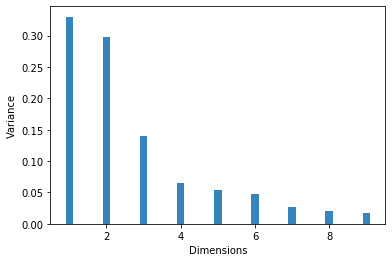

In [5]:
var= lda.explained_variance_ratio_
y= np.arange(1,len(var)+1)
plt.bar(y,var, align='center', alpha=0.9,width=0.2)
plt.xlabel('Dimensions')
plt.ylabel('Variance')
plt.show()


In [6]:
Y_test=np.asarray([1,3,3,3,4,4,4,4,5,5,5,1,5,6,6,6,6,7,7,7,7,8,1,8,8,8,9,9,9,9,10,10,10,1,10,0,0,0,0,2,2,2,2,3])
print("Accuracy is ",accuracy_score(Y_test, prdt)*100,'%')

Accuracy is  88.63636363636364 %
